# UMAP Analysis of Synthetic Microscopy Image Data

In this notebook, we will generate a synthetic dataset simulating measurements of cells from microscopy images. We will then perform UMAP on the data and visualize the results using seaborn.

## Import necessary libraries

We need the following libraries to proceed: numpy, scipy, pandas, seaborn, umap-learn, and scikit-learn.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import umap
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Create synthetic dataset

We will create a dataset with four features: intensity, aspect_ratio, perimeter, and elongation.

In [2]:
np.random.seed(42)
n_samples = 500
data = {
    'intensity': np.random.normal(100, 10, n_samples),
    'aspect_ratio': np.random.normal(1.5, 0.2, n_samples),
    'perimeter': np.random.normal(50, 5, n_samples),
    'elongation': np.random.normal(2, 0.5, n_samples)
}
df = pd.DataFrame(data)
df.head()

,intensity,aspect_ratio,perimeter,elongation
0,104.967142,1.685236,56.996777,2.389181
1,98.617357,1.881883,54.623168,1.724407
2,106.476885,1.220286,50.298152,1.590901
3,115.230299,1.612594,46.765316,1.998313
4,97.658466,1.369871,53.491117,1.914908


## Pre-process data for UMAP

Standardize the data before applying UMAP.

In [3]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

## Apply UMAP

Use UMAP to reduce the dimensionality of the data.

In [4]:
reducer = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
embedding = reducer.fit_transform(df_scaled)
df['UMAP1'] = embedding[:, 0]
df['UMAP2'] = embedding[:, 1]
df.head()

/opt/hostedtoolcache/Python/3.12.7/x64/lib/python3.12/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


,intensity,aspect_ratio,perimeter,elongation,UMAP1,UMAP2
0,104.967142,1.685236,56.996777,2.389181,3.999447,5.165542
1,98.617357,1.881883,54.623168,1.724407,6.947339,2.714202
2,106.476885,1.220286,50.298152,1.590901,2.869032,0.661736
3,115.230299,1.612594,46.765316,1.998313,5.245621,0.324965
4,97.658466,1.369871,53.491117,1.914908,6.761159,5.334298


## Visualize UMAP results

Plot the UMAP reduced data using seaborn.

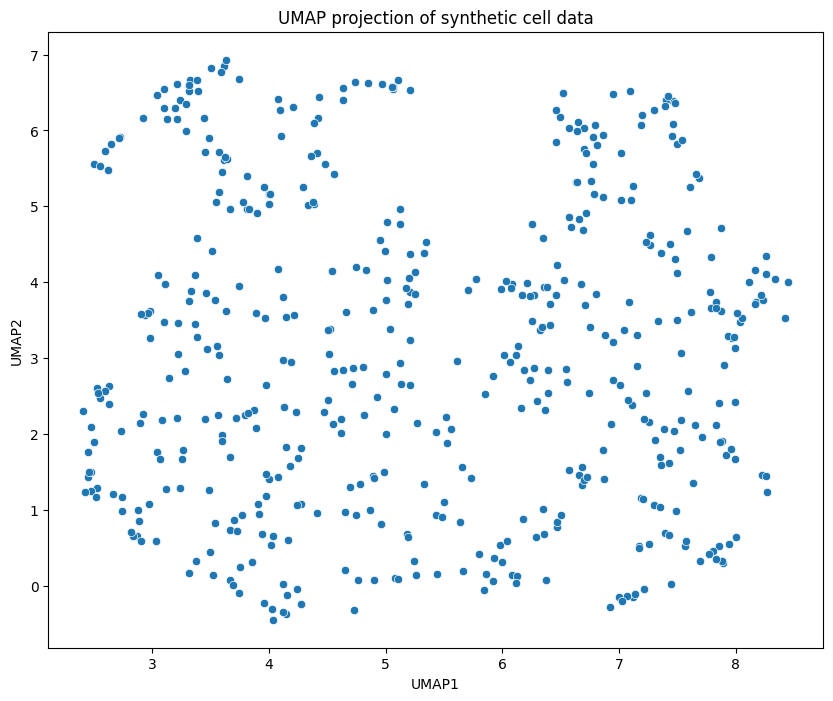

In [5]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='UMAP1', y='UMAP2')
plt.title('UMAP projection of synthetic cell data')
plt.savefig('umap_result.png')
plt.show()